In [1]:
import numpy as np

from system import (
    s_state,
    rows,
    cols,
    states,
    num_states,
    num_actions,
    wind_col,
    to_idx,
    get_valid_actions,
    init_mdp,
    init_reward,
)
from model import Model
from policy import Policy, PolicyInit
from agent import Agent

In [2]:
def EvaluatePolicy(
    policy: Policy, valf: np.ndarray, model: Model, thresh=0.01, gamma=1.0
):
    i = 0
    delta = thresh + 1
    while delta > thresh and i < 1000:
        delta = 0
        for s in states:
            v = valf[to_idx(s)]
            a = policy.get_action(s)

            valf[to_idx(s)] = model.prob(s, a) @ (model.get_reward(s) + gamma * valf)

            delta = max(delta, abs(v - valf[to_idx(s)]))
        i += 1
    return valf

In [3]:
def UpdatePolicy(policy: Policy, valf: np.ndarray, model: Model, gamma=1.0):
    policy_stable = True
    k = 0
    changed_policies = []
    for s in states:
        old_action = policy.get_action(s)
        valid_actions_idx = get_valid_actions(s, idx=True)
        action_value = [
            model.prob(s, a) @ (model.get_reward(s) + gamma * valf)
            for a in valid_actions_idx
        ]
        amzt = valid_actions_idx[np.argmax(action_value)]

        if valf[to_idx(s)] <= np.max(action_value):
            policy.set_action(s, amzt)
            if old_action != policy.get_action(s):
                policy_stable = False
                changed_policies.append(s)
                k += 1
    # print(f"Policy changed for {k} states")
    # print(f"Changed policies: {changed_policies}")
    return policy_stable

In [4]:
# Initialize model
mdp = init_mdp(num_states, num_actions, wind_col)
reward = init_reward(num_states, t_state=np.array([3, 7]), t_reward=0)
model = Model(mdp, reward)

# Initialize policy
policy = Policy(num_states, num_actions, PolicyInit.RANDOM)

In [5]:
for s in states:
    policy.set_action(s, policy.gen_action_idx(s))

In [6]:
# Initialize random state function
valf = np.random.uniform(0, 2, size=num_states)
valf_store = []
valf_store.append(valf.copy())
valstart = []
thresh = 0.01
gamma = 0.9

policy_stable = False
i = 0
while (not policy_stable) and i < 1000:
    print(f"Policy Iteration {i + 1}")

    # Policy Evaluation
    print("Evaluating Policy")
    valf = EvaluatePolicy(policy, valf, model, thresh, gamma)
    valf_store.append(valf)
    valstart.append(valf[to_idx(s_state)])

    # Policy Improvement
    print("Updating Policy")
    policy_stable = UpdatePolicy(policy, valf, model, gamma)
    i += 1

Policy Iteration 1
Evaluating Policy
Updating Policy
Policy Iteration 2
Evaluating Policy
Updating Policy
Policy Iteration 3
Evaluating Policy
Updating Policy
Policy Iteration 4
Evaluating Policy
Updating Policy
Policy Iteration 5
Evaluating Policy
Updating Policy
Policy Iteration 6
Evaluating Policy
Updating Policy
Policy Iteration 7
Evaluating Policy
Updating Policy
Policy Iteration 8
Evaluating Policy
Updating Policy
Policy Iteration 9
Evaluating Policy
Updating Policy
Policy Iteration 10
Evaluating Policy
Updating Policy


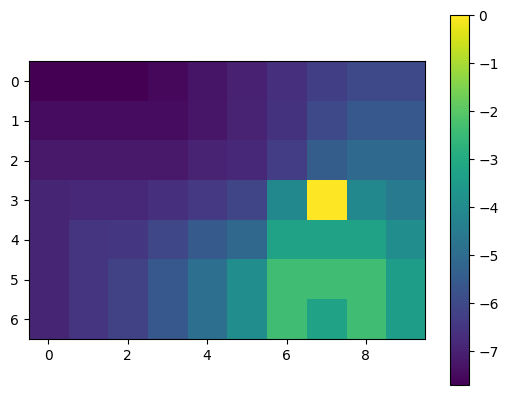

In [7]:
import matplotlib.pyplot as plt

valf_toplot = valf.reshape(rows, cols)
plt.gca().invert_yaxis()
heatmap = plt.imshow(valf_toplot)
plt.colorbar(heatmap)
plt.show()

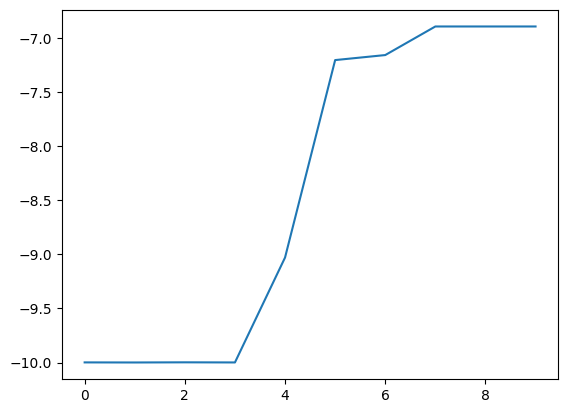

In [8]:
valstart = np.array(valstart)
plt.plot(valstart)

In [9]:
valf_store = np.array(valf_store)
valf_store = valf_store.T
print(valf_store.shape)

(70, 11)


In [10]:
agent = Agent(model, policy)
path, score = agent.play(model, policy, np.array([3,0]), 1000)

State: [3 0], Action: [1 1], Next State: [4 1], Reward: -1
State: [4 1], Action: [1 1], Next State: [5 2], Reward: -1
State: [5 2], Action: [1 1], Next State: [4 3], Reward: -1
State: [4 3], Action: [1 1], Next State: [3 4], Reward: -1
State: [3 4], Action: [1 1], Next State: [2 5], Reward: -1
State: [2 5], Action: [1 1], Next State: [1 6], Reward: -1
State: [1 6], Action: [1 1], Next State: [1 7], Reward: -1
State: [1 7], Action: [1 1], Next State: [2 8], Reward: -1
State: [2 8], Action: [1 1], Next State: [3 9], Reward: -1
State: [3 9], Action: [1 0], Next State: [4 9], Reward: -1
State: [4 9], Action: [ 1 -1], Next State: [4 8], Reward: -1
State: [4 8], Action: [ 1 -1], Next State: [4 7], Reward: -1
State: [4 7], Action: [1 0], Next State: [2 7], Reward: -1
State: [2 7], Action: [1 1], Next State: [2 8], Reward: -1
State: [2 8], Action: [1 1], Next State: [3 9], Reward: -1
State: [3 9], Action: [1 0], Next State: [4 9], Reward: -1
State: [4 9], Action: [ 1 -1], Next State: [3 8], Re

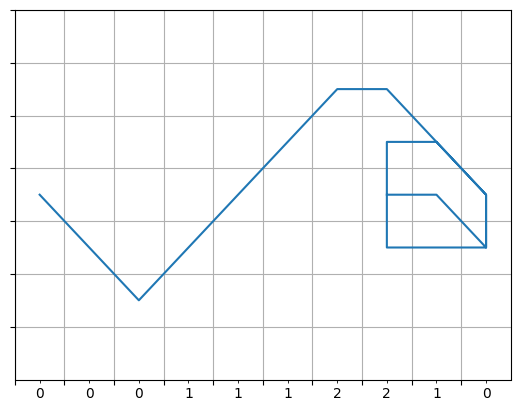

In [11]:
path_plt = np.array(path) + 0.5
y, x = path_plt.T

ax = plt.gca()
ax.grid()

ax.set_xlim(0, cols)
ax.set_xticks(np.arange(0, cols, 1), minor=False)
ax.set_xticklabels([])
ax.set_xticks(np.arange(0.5, cols, 1), minor=True)
ax.set_xticklabels([str(x) for x in wind_col], minor=True)

ax.set_ylim(rows, 0)
ax.set_yticks(np.arange(0, rows, 1), minor=False)
ax.set_yticklabels([])

ax.plot(x, y)
plt.show()